<a href="https://colab.research.google.com/github/rohanrjp/Netflix_EDA/blob/main/Netflix_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Start coding!
df=pd.read_csv("/content/drive/MyDrive/datasets/netflix_data.csv")
df.shape
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [6]:
df_mov=df[df["type"]=="Movie"]
df_mov.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies


In [7]:
cols_rem=["show_id","type","director","cast","date_added","description"]

netflix_movies=df_mov.drop(columns=cols_rem,axis=1)

netflix_movies.head()

,title,country,release_year,duration,genre
1,7:19,Mexico,2016,93,Dramas
2,23:59,Singapore,2011,78,Horror Movies
3,9,United States,2009,80,Action
4,21,United States,2008,123,Dramas
6,122,Egypt,2019,95,Horror Movies


In [8]:
short_movies=netflix_movies[netflix_movies["duration"]<60]
short_movies["genre"].value_counts()


Documentaries           151
Children                107
Stand-Up                 72
Uncategorized            40
Comedies                 15
Dramas                   12
Classic Movies            8
Action                    6
International Movies      3
Anime Features            3
Music                     2
Horror Movies             1
Name: genre, dtype: int64

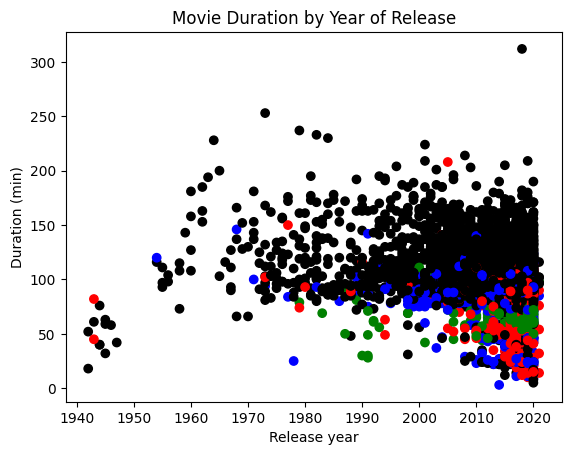

In [9]:
colors=[]

for idx,value in netflix_movies.iterrows():
    if value["genre"]=="Documentaries":
        colors.append("red")
    elif value["genre"]=="Children":
        colors.append("blue")
    elif value["genre"]=="Stand-Up":
        colors.append("green")
    else:
        colors.append("black")

fig=plt.figure()
plt.scatter(netflix_movies["release_year"],netflix_movies["duration"],c=colors)
plt.title("Movie Duration by Year of Release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")
plt.show()